In [1]:
%cd '/content/drive/My Drive/Colab Notebooks/Mini_Project'

/content/drive/My Drive/Colab Notebooks/Mini_Project


**Accuracy Of Each Models**

In [2]:
import plotly.graph_objects as go

In [3]:
y_tr=[ 0.7110	  ,0.8595	     ,0.8852	  ,0.8228   ,0.7774,	0.7865]
y_tst=[0.6768 , 0.7293     ,0.7374	  ,0.7475	  , 0.7657	,0.7111]
x= ['CNN','DenseNet','MobileNet','ResNet','VGG','Inception']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Validation'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Performance of Different Models',xaxis_title="Models",
    yaxis_title="Accuracy",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.3, 1])
fig.show()

In [4]:
import os
os.chdir('Models')

In [5]:
ls

DenseNet.h5  exception.h5  MobileNetmodel.h5  ResNetmode-3.h5  VGG19.h5


In [6]:
model_list=os.listdir()

In [7]:
model_list

['MobileNetmodel.h5',
 'ResNetmode-3.h5',
 'VGG19.h5',
 'exception.h5',
 'DenseNet.h5']

In [16]:
base_path='/content/drive/My Drive/Colab Notebooks/Mini_Project/'
%cd '/content/drive/My Drive/Colab Notebooks/Mini_Project'

/content/drive/My Drive/Colab Notebooks/Mini_Project


In [17]:
ls


dataset@  Models/  test@


In [18]:
os.chdir('test')

In [19]:
images=os.listdir()

In [20]:
images

['Non-Covid (220).png',
 '2020.02.26.20026989-p34-114_2%0.png',
 '2020.02.10.20021584-p6-52%5.png',
 '2020.03.03.20030775-p11-91.png',
 '1%0.jpg',
 '1101.png']

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import load_model
import numpy as np

**Prediction For Test Images**

   The new test images which is not used for training

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pa=base_path+'/Models/VGG19.h5'

model = load_model(pa)

model.compile(loss='categorical_crossentropy',

              optimizer='Adam',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.preprocessing import image

Class 0 = Covid;
Class 1= Non Covid;

The Predicted Value For Each Class is ---> [[0.30987874 0.6901213 ]]
The Predicted Class is --> 1
So CT Scan is COVID Negative


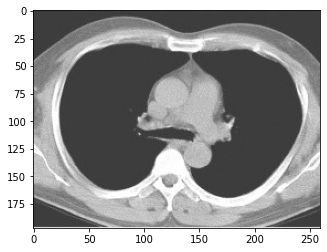

In [21]:
path=images[4]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.54939663 0.45060334]]
The Predicted Class is --> 0
So CT Scan is Covid Positive


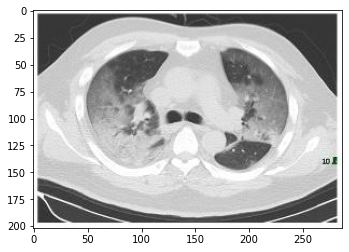

In [22]:
path=images[2]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.5118441 0.4881559]]
The Predicted Class is --> 0
So CT Scan is Covid Positive


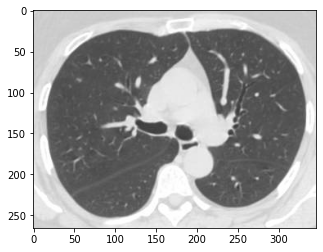

In [23]:
path=images[0]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

The Predicted Value For Each Class is ---> [[0.42818233 0.57181764]]
The Predicted Class is --> 1
So CT Scan is COVID Negative


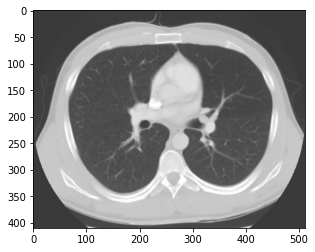

In [24]:
path=images[5]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Covid Positive',1:'COVID Negative'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So CT Scan is",decode[result])

**Grad CAM Image**

In [138]:
from keras.models import load_model
pa=base_path+'/Models/VGG19.h5'

model = load_model(pa)


In [139]:
model

In [141]:
a=model.layers

In [160]:
x=a[158]

In [161]:
x.name

'dense_25'

In [163]:
x.output.shape

TensorShape([None, 512])

In [36]:

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np
import imutils
import cv2

In [37]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

Generation Of GradCam Image for Covid and Non Covid Image

example1

In [127]:
image = load_img(images[5], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 1 is --> COVID Negative
The Predicted Value For Each Class is ---> [[0.42818233 0.57181764]]


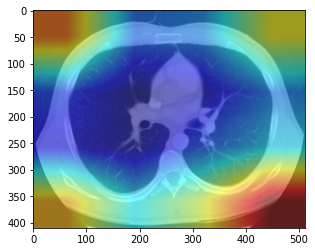

In [128]:
preds = model.predict(image)
clas= np.argmax(preds)

print("Class", clas, "is -->" ,decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[5])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example2

In [129]:
image = load_img(images[4], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 1 is --> COVID Negative
The Predicted Value For Each Class is ---> [[0.30987874 0.6901213 ]]


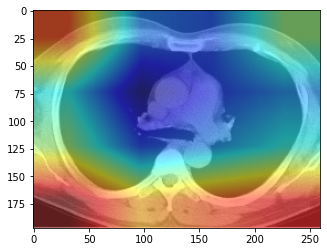

In [130]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class", clas, "is -->" ,decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[4])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example3

In [136]:
image = load_img(images[0], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 0 is --> Covid Positive
The Predicted Value For Each Class is ---> [[0.5118441 0.4881559]]


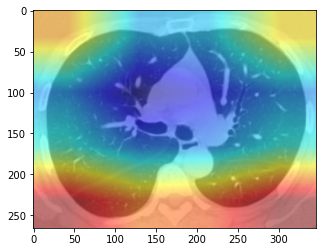

In [137]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class",clas,"is -->",decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[0])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

example4

In [134]:
image = load_img(images[2], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 0 is --> Covid Positive
The Predicted Value For Each Class is ---> [[0.54939663 0.45060334]]


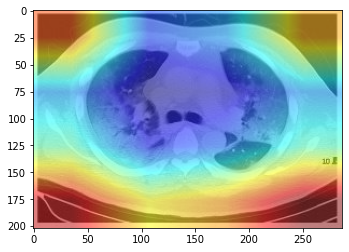

In [135]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class",clas,"is -->",decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[2])
resized = cv2.resize(orig, (128,128))
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)